In [166]:
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import deque

class Cuadrado():
    def __init__(self, dimensiones = 50, p = 0.45, pared=4, cueva = 5, semilla = None):
        self.semilla = semilla if semilla is not None else random.randint(0, 2**32 - 1)
        random.seed(semilla)
        self.dimensiones = dimensiones
        self.pared = pared
        self.cueva = cueva
        self.mapa = [[True if random.random() < p else False for _ in range(dimensiones)] for _ in range(dimensiones)]
    
    def pintar_mapa(self):
        # Crear un colormap personalizado donde True será blanco y False será negro
        cmap = mcolors.ListedColormap(['blue', 'white'])
        
        plt.figure(figsize=(5, 5))
        plt.imshow(self.mapa, cmap=cmap, interpolation="nearest")
        plt.axis("off")
        plt.show()
    
    def paso_de_simulacion(self):
        temp_mapa = [[None for _ in range(self.dimensiones)] for _ in range(self.dimensiones)]
        for x in range(self.dimensiones):
            for y in range(self.dimensiones):
                vecinos_vivos = self.contar_vecinos_vivos(x, y)
                if self.mapa[x][y]:
                    if vecinos_vivos < self.pared:
                        temp_mapa[x][y] = False
                    else:
                        temp_mapa[x][y] = True
                else:
                    if vecinos_vivos > self.cueva:
                        temp_mapa[x][y] = True
                    else:
                        temp_mapa[x][y] = False
        
        self.mapa = temp_mapa
    def contar_vecinos_vivos(self, x, y):
        '''
            x-1 x x+1
        y-1  #  #  #
         y   #  x  #
        y+1  #  #  #
        '''
        count = 0
        for i in range(-1,2):
            for j in range(-1,2):
                vecino_x = x+i
                vecino_y = y+j
                # No queremos contarnos a nosotros mmismos
                if i == 0 and j == 0:
                    continue
                # Para rellenar los bordes de la cueva, esto puede aplicarse.
                elif vecino_x < 0 or vecino_y < 0 or vecino_x >= self.dimensiones or vecino_y >= self.dimensiones:
                    count += 1
                elif self.mapa[vecino_x][vecino_y]:
                    count += 1
        return count
    
    def mantener_mayor_caverna(self):
        visitados = [[False for _ in range(self.dimensiones)] for _ in range(self.dimensiones)]
        mayor_caverna = []
        
        for i in range(self.dimensiones):
            for j in range(self.dimensiones):
                if not self.mapa[i][j] and not visitados[i][j]:
                    caverna_actual = []
                    cola = deque()
                    cola.append((i, j))
                    visitados[i][j] = True
                    
                    while cola:
                        x, y = cola.popleft()
                        caverna_actual.append((x, y))
                        
                        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
                            nx = x + dx
                            ny = y + dy
                            if 0 <= nx < self.dimensiones and 0 <= ny < self.dimensiones:
                                if not self.mapa[nx][ny] and not visitados[nx][ny]:
                                    visitados[nx][ny] = True
                                    cola.append((nx, ny))
                    #print(f"Actual {len(caverna_actual)} | Mayor {len(mayor_caverna)}")
                    if len(caverna_actual) > len(mayor_caverna):
                        mayor_caverna = caverna_actual
        nuevo_mapa = [[True for _ in range(self.dimensiones)] for _ in range(self.dimensiones)]
        for x, y in mayor_caverna:
            nuevo_mapa[x][y] = False
        self.mapa = nuevo_mapa

In [167]:
def automata_celular(iteraciones = 4,dimensiones = 50, p = 0.45, pared = 4, cueva = 5, semilla = None):
    mapa = Cuadrado(dimensiones=dimensiones, p = p, pared = pared, cueva = cueva, semilla = semilla)
    for _ in range(iteraciones):
        mapa.paso_de_simulacion()
    mapa.pintar_mapa()
    mapa.mantener_mayor_caverna()
    mapa.pintar_mapa()
    return mapa

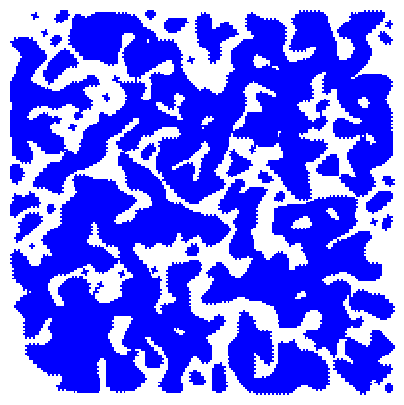

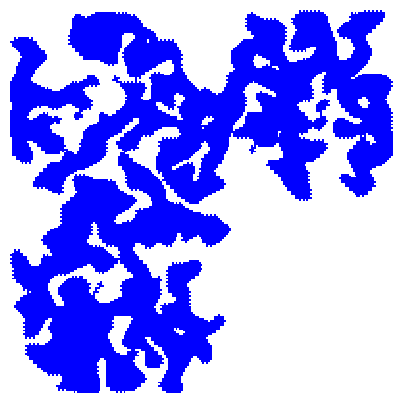

In [196]:
# TODO: Postprocesamiento con Flood Fill
'''
iteraciones = 4
dimensiones = 50
p = 0.6
pared = 5
cueva = 5
semilla = None
'''
iteraciones = 10
dimensiones = 200
p = 0.6
pared = 5
cueva = 4
semilla = None
mapa = automata_celular(iteraciones=iteraciones, dimensiones=dimensiones, p=p, pared=pared, cueva=cueva, semilla=semilla)

In [161]:
mapa.semilla

3750637524